<a href="https://colab.research.google.com/github/foxtrotmike/mine-pytorch/blob/master/All%20Experiments-fixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/foxtrotmike/mine-pytorch.git


Cloning into 'mine-pytorch'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 86 (delta 44), reused 37 (delta 9), pack-reused 0
Unpacking objects: 100% (86/86), done.


In [2]:
cd mine-pytorch/


/content/mine-pytorch


In [3]:
!pip install pytorch-lightning


     |████████████████████████████████| 808kB 8.6MB/s 
     |████████████████████████████████| 112kB 35.3MB/s 
     |████████████████████████████████| 829kB 48.0MB/s 
     |████████████████████████████████| 645kB 49.8MB/s 
     |████████████████████████████████| 276kB 35.2MB/s 
     |████████████████████████████████| 1.3MB 54.9MB/s 
     |████████████████████████████████| 296kB 45.4MB/s 
     |████████████████████████████████| 143kB 54.1MB/s 
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=ec9678f6990b140a0550af0b035bf0e9822d5e307662c12fcd2459e1cc607d7b
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
  Found existing installation: future 0.16.0
    Uninstalling future-0.16.0:
      Successfully uninstalled future-0.16.0
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mine.datasets import MultivariateNormalDataset
device = 'cuda' if torch.cuda.is_available() else 'cpu'
num_gpus = 1 if device=='cuda' else 0
print(device)

cuda


In [5]:
%load_ext autoreload
%autoreload 2
from mine.models.mine import MutualInformationEstimator
from pytorch_lightning import Trainer
import logging
logging.getLogger().setLevel(logging.ERROR)

dim = 1
N = 3000
lr = 1e-4
epochs = 200
batch_size = 500

steps = 15
rhos = np.linspace(-0.99, 0.99, steps)
loss_type = ['mine_biased']

results_dict = dict()

for loss in loss_type:
    results = []
    for rho in rhos:
        train_loader = torch.utils.data.DataLoader(
        MultivariateNormalDataset(N, dim, rho), batch_size=batch_size, shuffle=True)
        test_loader = torch.utils.data.DataLoader(
        MultivariateNormalDataset(N, dim, rho), batch_size=batch_size, shuffle=True)

        
        true_mi = train_loader.dataset.true_mi

        kwargs = {
            'lr': lr,
            'batch_size': batch_size,
            'train_loader': train_loader,
            'test_loader': test_loader,
            'alpha': 1.0
        }

        model = MutualInformationEstimator(
            dim, dim, loss=loss, **kwargs).to(device)
        
        trainer = Trainer(max_epochs=epochs,  gpus=num_gpus)
        trainer.fit(model)
        outputs = trainer.test()
        model.avg_test_mi = -np.mean([model(x,z).detach().numpy() for x,z in test_loader])

        print("True_mi {}".format(true_mi))
        print("MINE {}".format(model.avg_test_mi))
        results.append((rho, model.avg_test_mi, true_mi))

    results = np.array(results)
    results_dict[loss] = results

Device: cuda


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.5 K
1 | energy_loss | Mine             | 10.5 K
-------------------------------------------------
10.5 K    Trainable params
0         Non-trainable params
10.5 K    Total params
0.042     Total estimated model params size (MB)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Your test_dataloader has `shuffle=True`, it is best practice to turn this off for val/test/predict dataloaders.
  warnings.warn(*args, **kwargs)



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.5 K
1 | energy_loss | Mine             | 10.5 K
-------------------------------------------------
10.5 K    Trainable params
0         Non-trainable params
10.5 K    Total params
0.042     Total estimated model params size (MB)


True_mi 1.9585182666778564
MINE 1.7125838994979858


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
True_mi 0.6366140246391296
MINE 0.6379083395004272



  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.5 K
1 | energy_loss | Mine             | 10.5 K
-------------------------------------------------
10.5 K    Trainable params
0         Non-trainable params
10.5 K    Total params
0.042     Total estimated model params size (MB)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


GPU available: True, used: True
TPU available: False, using: 0 TPU cores



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
True_mi 0.34662458300590515
MINE 0.3459869921207428


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.5 K
1 | energy_loss | Mine             | 10.5 K
-------------------------------------------------
10.5 K    Trainable params
0         Non-trainable params
10.5 K    Total params
0.042     Total estimated model params size (MB)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.5 K
1 | energy_loss | Mine             | 10.5 K
-------------------------------------------------
10.5 K    Trainable params
0         Non-trainable params
10.5 K    Total params
0.042     Total estimated model params size (MB)


True_mi 0.19285525381565094
MINE 0.15662962198257446


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


GPU available: True, used: True



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
True_mi 0.09923666715621948
MINE 0.07462397962808609


TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.5 K
1 | energy_loss | Mine             | 10.5 K
-------------------------------------------------
10.5 K    Trainable params
0         Non-trainable params
10.5 K    Total params
0.042     Total estimated model params size (MB)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.5 K
1 | energy_loss | Mine             | 10.5 K
-------------------------------------------------
10.5 K    Trainable params
0         Non-trainable params
10.5 K    Total params
0.042     Total estimated model params size (MB)


True_mi 0.041695233434438705
MINE 0.054053694009780884


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.5 K
1 | energy_loss | Mine             | 10.5 K
-------------------------------------------------
10.5 K    Trainable params
0         Non-trainable params
10.5 K    Total params
0.042     Total estimated model params size (MB)


True_mi 0.010102408938109875
MINE 0.007566437125205994


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.5 K
1 | energy_loss | Mine             | 10.5 K
-------------------------------------------------
10.5 K    Trainable params
0         Non-trainable params
10.5 K    Total params
0.042     Total estimated model params size (MB)


True_mi -0.0
MINE -0.0010489746928215027


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.5 K
1 | energy_loss | Mine             | 10.5 K
-------------------------------------------------
10.5 K    Trainable params
0         Non-trainable params
10.5 K    Total params
0.042     Total estimated model params size (MB)


True_mi 0.010102408938109875
MINE 0.010541059076786041


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.5 K
1 | energy_loss | Mine             | 10.5 K
-------------------------------------------------
10.5 K    Trainable params
0         Non-trainable params
10.5 K    Total params
0.042     Total estimated model params size (MB)


True_mi 0.041695233434438705
MINE 0.048702970147132874


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.5 K
1 | energy_loss | Mine             | 10.5 K
-------------------------------------------------
10.5 K    Trainable params
0         Non-trainable params
10.5 K    Total params
0.042     Total estimated model params size (MB)


True_mi 0.09923666715621948
MINE 0.10701147466897964


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
True_mi 0.19285525381565094
MINE 0.18945598602294922


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.5 K
1 | energy_loss | Mine             | 10.5 K
-------------------------------------------------
10.5 K    Trainable params
0         Non-trainable params
10.5 K    Total params
0.042     Total estimated model params size (MB)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.5 K
1 | energy_loss | Mine             | 10.5 K
-------------------------------------------------
10.5 K    Trainable params
0         Non-trainable params
10.5 K    Total params
0.042     Total estimated model params size (MB)


True_mi 0.34662458300590515
MINE 0.33381354808807373


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.5 K
1 | energy_loss | Mine             | 10.5 K
-------------------------------------------------
10.5 K    Trainable params
0         Non-trainable params
10.5 K    Total params
0.042     Total estimated model params size (MB)


True_mi 0.6366140246391296
MINE 0.6309193968772888


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
True_mi 1.9585182666778564
MINE 1.7729870080947876


-1.7491288


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  # This is added back by InteractiveShellApp.init_path()


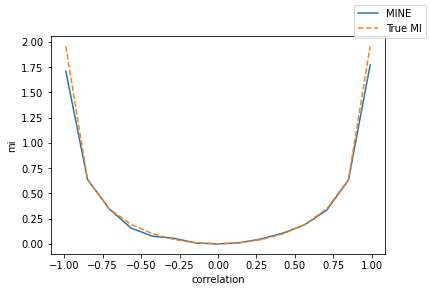

In [6]:
fig, axs = plt.subplots(1, len(loss_type), sharex = True, figsize = (6,4))
plots = []
for ix, loss in enumerate(loss_type):
    results = results_dict[loss]
    plots += axs.plot(results[:,0], results[:,1], label='MINE')
    plots += axs.plot(results[:,0], results[:,2], linestyle='--', label='True MI')
    axs.set_xlabel('correlation')
    axs.set_ylabel('mi')
    #axs.title.set_text(f"{loss} for {dim} dimensional inputs")
    
fig.legend(plots[0:2], labels = ['MINE', 'True MI'], loc='upper right')
fig.savefig('figures/mi_estimation.png')
    
    

In [24]:
## Function experiment
N = 3000
lr = 1e-4
batch_size = 256
epochs = 200

def f1(x): return x
def f2(x): return x**3
def f3(x): return torch.sin(x)

sigmas = torch.linspace(0, 0.9, 10)
fs = [f1, f2, f3]
dim = 2

res = []
for sigma in sigmas:
    for ix, f in enumerate(fs):
        print(f"Experiment: {ix + 1}, Sigma: {sigma}...")

        kwargs = {
            'N': N,
            'sigma': sigma,
            'f': f,
            'lr': lr,
            'batch_size': batch_size,
            'alpha': 0.1
        }

        model = MutualInformationEstimator(
            dim, dim, loss='mine_biased', **kwargs).to(device)
        trainer = Trainer(max_epochs=epochs,
                           gpus=num_gpus)#early_stop_callback=False,
        trainer.fit(model)
        trainer.test()
        #model.avg_test_mi = -np.mean([model(x,z).detach().numpy() for x,z in model.test_dataloader])
        model.avg_test_mi = -np.mean([model(x,z).detach().numpy() for x,z in model.test_dataloader()])

        # Append result
        res.append([ix, sigma, model.avg_test_mi])


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 1, Sigma: 0.0...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Your test_dataloader has `shuffle=True`, it is best practice to turn this off for val/test/predict dataloaders.
  warnings.warn(*args, **kwargs)



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 2, Sigma: 0.0...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 3, Sigma: 0.0...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 1, Sigma: 0.09999999403953552...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 2, Sigma: 0.09999999403953552...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 3, Sigma: 0.09999999403953552...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 1, Sigma: 0.19999998807907104...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 2, Sigma: 0.19999998807907104...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 3, Sigma: 0.19999998807907104...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 1, Sigma: 0.29999998211860657...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 2, Sigma: 0.29999998211860657...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 3, Sigma: 0.29999998211860657...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 1, Sigma: 0.3999999761581421...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 2, Sigma: 0.3999999761581421...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 3, Sigma: 0.3999999761581421...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 1, Sigma: 0.5...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 2, Sigma: 0.5...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 3, Sigma: 0.5...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 1, Sigma: 0.6000000238418579...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 2, Sigma: 0.6000000238418579...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Experiment: 3, Sigma: 0.6000000238418579...



  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 1, Sigma: 0.699999988079071...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 2, Sigma: 0.699999988079071...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 3, Sigma: 0.699999988079071...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 1, Sigma: 0.7999999523162842...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 2, Sigma: 0.7999999523162842...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Experiment: 3, Sigma: 0.7999999523162842...



  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 1, Sigma: 0.8999999761581421...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 2, Sigma: 0.8999999761581421...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | T           | CustomSequential | 10.7 K
1 | energy_loss | Mine             | 10.7 K
-------------------------------------------------
10.7 K    Trainable params
0         Non-trainable params
10.7 K    Total params
0.043     Total estimated model params size (MB)


Experiment: 3, Sigma: 0.8999999761581421...


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


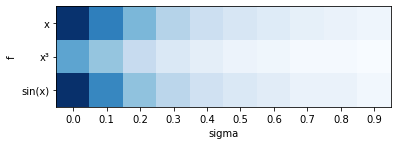

In [25]:
res = np.array(res)
Z = res[:, -1].reshape((len(sigmas), len(fs))).T
plt.figure()
plt.imshow(Z, cmap='Blues')
plt.yticks([0,1,2],['x', 'x³', 'sin(x)'])
plt.xticks(np.arange(10),sigmas.numpy().round(2))
plt.xlabel('sigma')
plt.ylabel('f')
plt.show()

## GANs

In [ ]:
%load_ext autoreload
%autoreload 2
# GAN spiral experiment
from mine.models.gan import GAN
from mine.models.mine import T, Mine
from mine.datasets import load_dataloader
from pytorch_lightning import Trainer

from collections import defaultdict

import torch
import torch.nn as nn
import numpy as np
import itertools

from mine.models.layers import LinearDiscriminator, LinearGenerator, DCGanDiscriminator, DCGanGenerator
from mine.models.adaptive_gradient_clipping import adaptive_gradient_clipping_

import pytorch_lightning as pl
import torchvision
import random
import matplotlib.pyplot as plt

from mine.datasets import to_onehot
class GAN(pl.LightningModule):
    def __init__(self, idim, odim,
                 discriminator_type='linear',
                 generator_type='linear',
                 conditional_dim=0,
                 mi_estimator=None,
                 idevice='cpu',
                 **kwargs):
        super().__init__()

        self.idim = idim
        self.idevice = idevice

        self.generator_type = generator_type

        if generator_type == 'linear':
            self.generator = LinearGenerator(
                idim + conditional_dim, odim).to(idevice)
        elif generator_type == 'veegan':
            self.generator = DCGanGenerator(
                latent_dim=idim + conditional_dim
            ).to(idevice)

        if discriminator_type == 'linear':
            self.discriminator = LinearDiscriminator(odim).to(idevice)
        elif discriminator_type == 'veegan':
            self.discriminator = DCGanDiscriminator().to(idevice)

        self.loss = nn.BCELoss()

        self.mi_estimator = mi_estimator

        self.beta = kwargs['beta']
        self.train_loader = kwargs['train_loader']
        self.lr = kwargs['lr']

        self.generated = None
        self.conditional_dim = conditional_dim

        self.smoothing = kwargs.get('smoothing')
        self.condition_on_labels = kwargs.get('condition_on_labels')
        self.condition_on_z = kwargs.get('condition_on_z')

        self.kwargs = kwargs

    # Samples from  N(0, I) of dim : idim

    def sample_z(self, N, conditional):
        if self.generator_type == 'linear' or self.generator_type == 'veegan':
            z = torch.rand((N, self.idim)).to(self.idevice) * 2 - 1

            if conditional is not None:
                conditional = conditional.to(self.idevice)
                if len(conditional.shape) < 2:
                    conditional = conditional.unsqueeze(0)

                if len(conditional) < len(z):
                    conditional = conditional.repeat(z.shape[0], 1)
                z = torch.cat((z, conditional), dim=1)
            return z
        else:
            print("Generator type must be one of 'linear' 'veegan'")

    @staticmethod
    def random_conditional(N, conditional_dim):
        random_labels = torch.randint(0, conditional_dim, size=(N,))
        conditionals = to_onehot(random_labels, N)

        return conditionals

    def plot_grid(self, samples, conditional=None):
        plt.figure()
        if isinstance(samples, torch.Tensor):
            samples = samples.cpu().data.numpy()
        if isinstance(conditional, torch.Tensor):
            conditional = conditional.cpu().data.numpy()

        if conditional is not None:
            c = np.argmax(conditional, 1)
        else:
            c = 'blue'
        plt.scatter(samples[:, 0], samples[:, 1], c=c)
        plt.suptitle('Conditional samples')

    def generate_img_grid(self, num_samples=25):
        conditional = self.random_conditional(
            num_samples, self.conditional_dim)
        z = self.sample_z(num_samples, conditional)
        generated = self.generator(z)  # num_samples x dim
        return generated, conditional

    def forward(self, N, conditional):
        z = self.sample_z(N, conditional)
        generated = self.generator(z)
        return generated

    def sample(self, N, conditional=None):
        return self.forward(N, conditional)

    def configure_optimizers(self):
        opt_g = torch.optim.Adam(itertools.chain(
            self.generator.parameters(), self.mi_estimator.parameters()), lr=self.lr, betas=(0.5, 0.999))
        opt_d = torch.optim.Adam(
            self.discriminator.parameters(), lr=self.lr, betas=(0.5, 0.999))
        return [opt_g, opt_d]

    def mi_input(self, generated, conditional, z):
        if self.kwargs.get('condition_on_labels') and conditional is not None:
            X = conditional
        elif self.kwargs.get('condition_on_z'):
            X = z
        else:
            X = None

        return X, generated

    def training_step(self, batch, batch_idx, optimizer_idx):
        if len(batch) == 2:
            x_real, conditional = batch
        else:
            x_real = batch
            conditional = None

        if not self.kwargs['use_conditional']:
            conditional = None

        if self.on_gpu:
            x_real = x_real.float().cuda()
            if conditional is not None:
                conditional = conditional.float().cuda()

        valid = torch.ones((x_real.shape[0], 1)).to(self.idevice)
        fake = torch.zeros((x_real.shape[0], 1)).to(self.idevice)

        g_loss = 0
        d_loss = 0

        if optimizer_idx == 0:
            # Generator
            z = self.sample_z(x_real.shape[0], conditional)
            self.generated = self.generator(z)
            generated_disc = self.discriminator(self.generated)

            conditional, generated = self.mi_input(
                self.generated, conditional, z)

            if conditional is not None:
                mi = self.mi_estimator(generated, conditional)
            else:
                mi = 0

            generator_loss = self.loss(generated_disc, valid)
            g_loss = generator_loss + self.beta * mi

            adaptive_gradient_clipping_(self.generator, self.mi_estimator)

            tqdm_dict = {
                'g_loss': g_loss
            }

            output = {
                'loss': g_loss,
                'progress_bar': tqdm_dict,
                'log': tqdm_dict
            }

        elif optimizer_idx == 1:
            # Discriminator
            disc_real = self.discriminator(x_real)
            if self.smoothing:
                valid = valid - 0.3*torch.rand(valid.shape).to(self.idevice)
            loss_real = self.loss(disc_real, valid)

            disc_fake = self.discriminator(self.generated.detach())
            loss_fake = self.loss(disc_fake, fake)

            d_loss = 0.5 * (loss_real + loss_fake)

            tqdm_dict = {
                'd_loss': d_loss
            }

            output = {
                'loss': d_loss,
                'progress_bar': tqdm_dict,
                'log': tqdm_dict
            }

        return output

    def plot_img(self, batch, batch_idx):
        x, c = batch
        z = self.sample_z(1, c[0:1])

        generated = self.generator(z)
        plt.figure()
        plt.imshow(generated[0].cpu().data.numpy())

    
    def train_dataloader(self):
        return self.train_loader
datasets = ['gaussians']
loss = 'mine_biased'
num_samples = 4000
batch_size = 256
epochs = 600
lr = 1e-4
betas = [0.0, 1.0]
alpha = 0.1
#dataset = 'spiral'

results = defaultdict(dict)

for dataset in datasets:
    for beta in betas:
        train_loader = load_dataloader(dataset, batch_size, N=num_samples)
        img, label = next(iter(train_loader))

        output_dim = np.prod(img.shape[1:])
        input_dim = 100
        lr = lr
        beta = beta

        kwargs = {
            'lr': lr,
            'train_loader': train_loader,
            'beta': beta,
            'alpha': alpha,
            'use_conditional': True,
            'condition_on_labels': True
        }

        mi_model = T(output_dim, label.shape[-1]).to(device)
        mi_estimator = Mine(mi_model, loss=loss).to(device)

        model = GAN(input_dim, 
                    output_dim, 
                    idevice=device,
                   generator_type = 'linear', 
                    discriminator_type = 'linear', 
                    mi_estimator=mi_estimator, 
                    conditional_dim=label.shape[-1], **kwargs).to(device)

        trainer = Trainer(max_epochs=epochs,  gpus=num_gpus)
        trainer.fit(model)
        model.generator.to(device)

        generated_grid, conditional = model.generate_img_grid(num_samples)
        results[dataset][beta] = [generated_grid.cpu().data.numpy(), conditional.cpu().data.numpy()]
    
    


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type                | Params
------------------------------------------------------
0 | generator     | LinearGenerator     | 316 K 
1 | discriminator | LinearDiscriminator | 322 K 
2 | loss          | BCELoss             | 0     
3 | mi_estimator  | Mine                | 332 K 
------------------------------------------------------
971 K     Trainable params
0         Non-trainable params
971 K     Total params
3.885     Total estimated model params size (MB)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type                | Params
------------------------------------------------------
0 | generator     | LinearGenerator     | 316 K 
1 | discriminator | LinearDiscriminator | 322 K 
2 | loss          | BCELoss             | 0     
3 | mi_estimator  | Mine                | 332 K 
------------------------------------------------------
971 K     Trainable params
0         Non-trainable params
971 K     Total params
3.885     Total estimated model params size (MB)


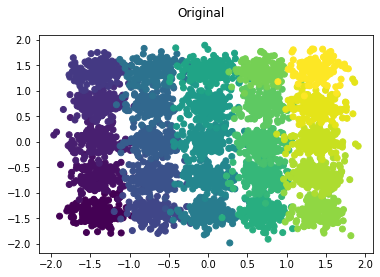

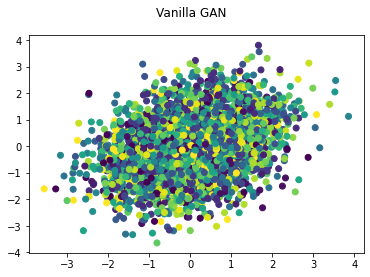

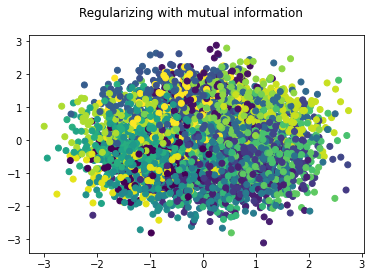

In [67]:
from mine.datasets import to_onehot

data = train_loader.dataset
x_np = data.x_np
labels = data.labels

plt.figure()
plt.scatter(x_np[:,0], x_np[:,1], c = labels)
plt.suptitle('Original')
plt.savefig('figures/25gaussians.png')

dataset = 'gaussians'
generated_grid, conditional = results[dataset][0.0]
model.plot_grid(generated_grid, conditional)
title = plt.suptitle('Vanilla GAN')
plt.savefig('figures/25gaussians_gan.png')

#plt.figure()
generated_grid, conditional = results[dataset][1.0]
model.plot_grid(generated_grid, conditional)
title = plt.suptitle('Regularizing with mutual information')
plt.savefig('figures/25gaussians_mine.png')

In [ ]:
## IBNetwork on MNIST

In [ ]:
from models.information_bottleneck import IBNetwork, StatisticsNetwork
from models.mine import Mine

batch_size = 512
epochs = 100
K = 256
beta = 1e-3
lr = 1e-3
x_dim = 28*28
z_dim = K


t = StatisticsNetwork(x_dim, z_dim, device=device).to(device)
mi_estimator = Mine(t, loss='mine', method='concat').to(device)
ibnetwork = IBNetwork(input_dim=28*28, K=K, output_dim=10,
                      mi_estimator=mi_estimator, lr=lr, beta=beta).to(device)

trainer = Trainer(max_epochs=epochs,
                  gpus=1, early_stop_callback=False)
trainer.fit(ibnetwork)

[autoreload of models.mine failed: Traceback (most recent call last):
  File "/home/gustaf/anaconda3/envs/fun/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/gustaf/anaconda3/envs/fun/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/home/gustaf/anaconda3/envs/fun/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/home/gustaf/anaconda3/envs/fun/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/home/gustaf/anaconda3/envs/fun/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/home/gustaf/anaconda3/envs/fun/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 302, in update_

Device: cuda


Epoch 1:   1%|          | 3/275 [00:00<00:15, 17.90batch/s, accuracy=0.211, batch_idx=2, error_rate=0.789, gpu=0, loss=2.304, v_num=959]

Epoch 2:   1%|          | 2/275 [00:00<00:06, 40.24batch/s, accuracy=0.965, batch_idx=1, error_rate=0.0352, gpu=0, loss=0.178, v_num=959]    

/home/gustaf/anaconda3/envs/fun/lib/python3.6/site-packages/pytorch_lightning/trainer/training_io.py:342: UserWarning: Did not find hyperparameters at model.hparams. Saving checkpoint without hyperparameters
  "Did not find hyperparameters at model.hparams. Saving checkpoint without"


Epoch 2:  56%|█████▌    | 154/275 [00:06<00:05, 22.88batch/s, accuracy=0.938, batch_idx=153, error_rate=0.0625, gpu=0, loss=0.118, v_num=959] 

KeyboardInterrupt: 